In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
data = pd.read_csv('../data/csv/Gold_DataRF.csv')
data.reset_index()
df = pd.DataFrame(data)
df.index.name = 'Week'
data.head()

,Business_Week,Week_Count,Gold_Change,Gold_Settle,Gold_Volume,Gold_Prev. Day Open Interest,Date,Open Interest,Money Manager Shorts,Money Manager Longs,...,USD_Change,USD_Settle,USD_Volume,USD_Wave,USD_Prev. Day Open Interest,ZAR_Change,ZAR_Settle,ZAR_Volume,ZAR_Wave,ZAR_Prev. Day Open Interest
Week,,,,,,,,,,,,,,,,,,,,,
0,"[2006-06-07, 2006-06-13]",0,0.0,602.80,324.80000,189517.8,6/13/2006,382474,30916,103211,...,1.760,85.7620,7364.2,NaN,38753.4,0.0760,6.7790,65.00,NaN,2332.40
1,"[2006-06-14, 2006-06-20]",1,0.0,570.50,78.40000,191302.8,6/20/2006,390281,30963,94632,...,0.013,86.2112,772.6,NaN,37679.6,0.1175,6.9283,45.00,NaN,2276.80
2,"[2006-06-21, 2006-06-27]",2,0.0,584.18,51.80000,189599.0,6/27/2006,384321,32287,91042,...,0.340,86.0000,5056.2,NaN,23433.4,0.1715,7.4125,359.25,NaN,2395.75
3,"[2006-06-28, 2006-07-04]",3,0.0,594.40,31923.66667,297778.0,7/3/2006,392868,30452,92545,...,-1.300,85.2640,2935.2,NaN,19682.8,-0.2920,7.1685,35.60,NaN,2007.00
4,"[2006-07-05, 2006-07-11]",4,0.0,634.00,43180.20000,253799.8,7/11/2006,427008,27624,104213,...,0.230,85.0220,2823.0,NaN,19415.6,0.0960,7.1820,186.20,NaN,2227.00


In [3]:
data.tail()

,Business_Week,Week_Count,Gold_Change,Gold_Settle,Gold_Volume,Gold_Prev. Day Open Interest,Date,Open Interest,Money Manager Shorts,Money Manager Longs,...,USD_Change,USD_Settle,USD_Volume,USD_Wave,USD_Prev. Day Open Interest,ZAR_Change,ZAR_Settle,ZAR_Volume,ZAR_Wave,ZAR_Prev. Day Open Interest
Week,,,,,,,,,,,,,,,,,,,,,
679,"[2019-06-12, 2019-06-18]",679,23.0,1339.300,263.00,380583.60,6/18/2019,858867,26969,216650,...,1.013,97.1488,20748.8,97.0402,47139.4,-0.16125,14.84850,9.5,14.848470,132.666667
680,"[2019-06-19, 2019-06-25]",680,72.3,1392.580,94.00,413095.40,6/25/2019,1014917,25908,255572,...,-1.505,95.9146,26570.0,96.0300,46420.0,-0.19175,14.48855,18.0,14.529198,NaN
681,"[2019-06-26, 2019-07-02]",681,51.5,1406.920,275744.00,427034.20,7/2/2019,1031393,17327,258490,...,0.626,95.9638,14437.8,95.9282,43682.4,-0.28325,14.27985,14.4,14.299248,NaN
682,"[2019-07-03, 2019-07-09]",682,34.3,1405.375,389188.25,426279.25,7/9/2019,1010098,24254,241396,...,0.821,96.7262,11471.2,96.6886,41304.8,0.05575,14.24630,11.8,14.243434,NaN
683,"[2019-07-10, 2019-07-16]",683,26.9,1411.220,330835.00,366538.20,7/16/2019,1038695,28250,248138,...,-0.054,96.6758,14858.2,96.6838,42843.8,-0.21575,14.05680,22.8,14.073684,NaN


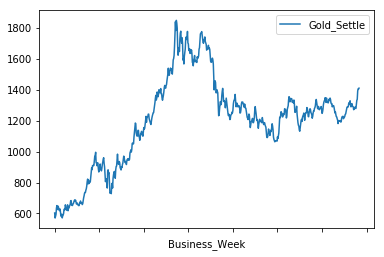

In [4]:
df.plot.line(x = 'Business_Week', y = 'Gold_Settle')
plt.show()

In [5]:
#Subsetting the dataset
data = pd.read_csv('../data/csv/Gold_DataRF.csv', nrows = 650)
#Creating train and test set 
train=df[0:650] 
test=df[650:]

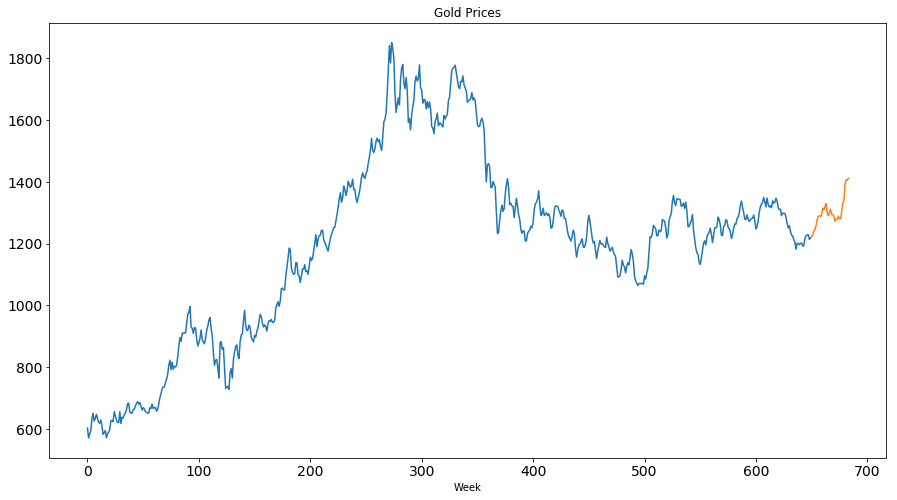

In [6]:
#Plotting data
train.Gold_Settle.plot(figsize=(15,8), title= 'Gold Prices', fontsize=14)
test.Gold_Settle.plot(figsize=(15,8), title= 'Gold Prices', fontsize=14)
plt.show()

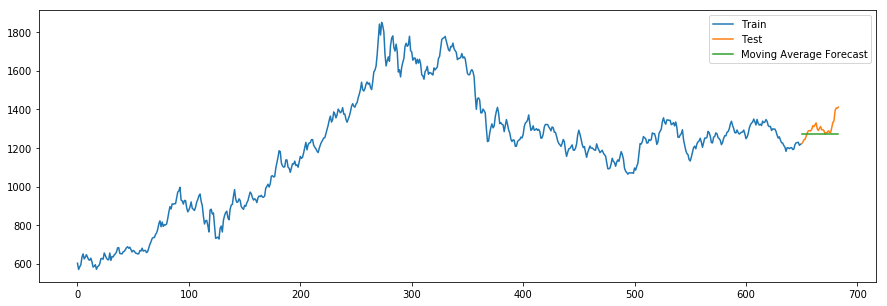

In [26]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Gold_Settle'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(train['Gold_Settle'], label='Train')
plt.plot(test['Gold_Settle'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()
#source: https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

In [27]:
rmse = sqrt(mean_squared_error(test.Gold_Settle, y_hat_avg.moving_avg_forecast))
print("RMSE:",rmse)

RMSE: 53.93658988514643
